<a href="https://colab.research.google.com/github/GIBSONGODSAN/MachineLearningAlgorithms/blob/AIML_MINI_JUPYTER_CODE/AIML_EXAM_JUPYTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# BREADTH FIRST SEARCH
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = [] # List for visited nodes.
queue = []     #Initialize a queue

def bfs(visited, graph, node): #function for BFS
  visited.append(node)
  queue.append(node)

  while queue:          # Creating loop to visit each node
    m = queue.pop(0) 
    print (m, end = " ") 

    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

# Driver Code
print("Following is the Breadth-First Search")
bfs(visited, graph, '5')    # function calling


Following is the Breadth-First Search
5 3 7 2 4 8 

In [ ]:
# DEPTH FIRST SEACH
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = set() # Set to keep track of visited nodes of graph.

def dfs(visited, graph, node):  #function for dfs 
    if node not in visited:
        print (node, end=" ")
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
print("Following is the Depth-First Search")
dfs(visited, graph, '5')

Following is the Depth-First Search
5 3 2 4 8 7 

In [ ]:
# A* SEARCH

def aStarAlgo(start_node, stop_node):
    open_set = set(start_node)
    closed_set = set()
    g = {}
    parents = {}

    g[start_node] = 0
    parents[start_node] = start_node
    while len(open_set) > 0:
        n = None
        for v in open_set:
            if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n = v
        if n == stop_node or Graph_nodes[n] is None:
            pass
        else:
            for (m, weight) in get_neighbours(n):
                if m not in open_set and m not in closed_set:
                    open_set.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n
                    if m in closed_set:
                        closed_set.remove(m)
                        open_set.add(m)
        if n is None:
            print('path does not exist!')
            return None
        if n == stop_node:
            path = []
            while parents[n] != n:
                path.append(n)
                n = parents[n]
            path.append(start_node)
            path.reverse(
            )
            return path
        open_set.remove(n)
        closed_set.add(n)
    print('path does not exist!')
    return None


def get_neighbours(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None


def heuristic(n):
    H_dist = {
        'A': 10,
        'B': 8,
        'C': 5,
        'D': 7,
        'E': 3,
        'F': 6,
        'G': 5,
        'H': 3,
        'I': 1,
        'J': 0
    }
    return H_dist[n]


Graph_nodes = {
    'A': [('B', 6), ('F', 3)],
    'B': [('C', 3), ('D', 2)],
    'C': [('D', 1), ('E', 5)],
    'D': [('C', 1), ('E', 8)],
    'E': [('I', 5), ('J', 5)],
    'F': [('G', 1), ('H', 7)],
    'G': [('I', 3)],
    'H': [('I', 2)],
    'I': [('E', 5), ('J', 3)]
}

aStarAlgo('A', 'J')

['A', 'F', 'G', 'I', 'J']

In [ ]:
# MEMORY BOUNDED A* SEARCH

import heapq
class Node:
    def __init__(self, state, parent=None, g=0, h=0):
        self.state = state
        self.parent = parent
        self.g = g
        self.h = h

    def f(self):
        return self.g + self.h


def memory_bounded_a_star(start_state, goal_state, successors_fn, heuristic_fn, memory_limit):
    open_list = []
    closed_list = {}
    max_memory = 0

    start_node = Node(start_state)
    heapq.heappush(open_list, (start_node.f(), start_node))

    while open_list:
        _, current_node = heapq.heappop(open_list)
        closed_list[current_node.state] = current_node

        if current_node.state == goal_state:
            return reconstruct_path(current_node)

        successors = successors_fn(current_node.state)
        for successor_state, action_cost in successors:
            g = current_node.g + action_cost
            h = heuristic_fn(successor_state)
            successor_node = Node(successor_state, current_node, g, h)

            if successor_state in closed_list:
                existing_node = closed_list[successor_state]
                if g < existing_node.g:
                    del closed_list[successor_state]
                    heapq.heappush(open_list, (successor_node.f(), successor_node))
            else:
                heapq.heappush(open_list, (successor_node.f(), successor_node))
                if len(closed_list) > memory_limit:
                    _, node_to_remove = closed_list.popitem(last=False)
                    if node_to_remove.f() > max_memory:
                        max_memory = node_to_remove.f()

    raise ValueError("No path found")

def reconstruct_path(node):
    path = []
    while node is not None:
        path.append(node.state)
        node = node.parent
    path.reverse()
    return path

# Example usage
def successors_fn(state):
    if state == 'A':
        return [('B', 5), ('C', 3)]
    elif state == 'B':
        return [('D', 2), ('E', 4)]
    elif state == 'C':
        return [('F', 6)]
    elif state == 'D':
        return [('G', 1)]
    elif state == 'E':
        return [('G', 3)]
    elif state == 'F':
        return [('G', 7)]
    else:
        return []

def heuristic_fn(state):
    heuristic_values = {
        'A': 10,
        'B': 8,
        'C': 6,
        'D': 4,
        'E': 6,
        'F': 3,
        'G': 0
    }
    return heuristic_values[state]


start_state = 'A'
goal_state = 'G'
memory_limit = 10

path = memory_bounded_a_star(start_state, goal_state, successors_fn, heuristic_fn, memory_limit)
print("Path:", path)


Path: ['A', 'B', 'D', 'G']


In [ ]:
# NAIVE BAYES

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

df = pd.read_csv("D:\PlayGolf.csv")
print(df)
feature_col_names = ['Outlook', 'Temp', 'Humidity', 'Windy']
predicted_class_names = ['PlayGolf']

X = df[feature_col_names].values # these are factors for the prediction
y = df[predicted_class_names].values # this is what we want to predict

#splitting the dataset into train and test data
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33)

print ('\n the total number of Training Data :',ytrain.shape)
print ('\n the total number of Test Data :',ytest.shape)


# Training Naive Bayes (NB) classifier on training data.
clf = GaussianNB().fit(xtrain,ytrain.ravel())
predicted = clf.predict(xtest)
predictTestData= clf.predict([[1,3,1,2]])

#printing Confusion matrix, accuracy, Precision and Recall
#print('\nConfusion matrix')
#print(metrics.confusion_matrix(ytest,predicted))
print('\nAccuracy of the classifier is',metrics.accuracy_score(ytest,predicted))
#print('\nThe value of Precision', metrics.precision_score(ytest,predicted))
#print('\nThe value of Recall', metrics.recall_score(ytest,predicted))
print("Predicted Value for individual Test Data:", predictTestData)

    Outlook  Temp  Humidity  Windy  PlayGolf
0         1     1         1      1         0
1         1     1         1      2         0
2         2     1         1      1         1
3         3     2         1      1         1
4         3     3         2      1         1
5         3     3         2      2         0
6         2     3         2      2         1
7         1     2         1      1         0
8         1     3         2      1         1
9         3     2         2      1         1
10        1     2         2      2         1
11        2     2         1      2         1
12        2     1         2      1         1
13        3     2         1      2         0

 the total number of Training Data : (9, 1)

 the total number of Test Data : (5, 1)

Accuracy of the classifier is 0.6
Predicted Value for individual Test Data: [0]


In [ ]:
# BAYESIAN NETWORK

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd
import numpy as np

# Define the Bayesian network structure
model = BayesianNetwork([('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'E')])

# Define the data for learning the parameters
data = np.random.randint(low=0, high=2, size=(1000, 5))
data = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E'])

# Learn the parameters using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Perform inference
infer = VariableElimination(model)

# Query the posterior probability
posterior = infer.query(['E'], evidence={'A': 1, 'B': 0, 'C': 1, 'D': 0})
print("Posterior probability of E:")
print(posterior)

# Query the most likely explanation
explanation = infer.map_query(['E'], evidence={'A': 1, 'B': 0, 'C': 1, 'D': 0})
print("Most likely explanation for E:")
print(explanation)


Posterior probability of E:
+------+----------+
| E    |   phi(E) |
+======+==========+
| E(0) |   0.5174 |
+------+----------+
| E(1) |   0.4826 |
+------+----------+


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Most likely explanation for E:
{'E': 0}


In [ ]:
# LINEAR REGRESSION

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df = pd.read_csv("D:\diabetes.csv")
feature_col_names = ['Glucose']
predicted_class_names = ['Outcome']

X = df[feature_col_names].values # these are factors for the prediction
y = df[predicted_class_names].values # this is what we want to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the new data
new_data = np.array([[148],[85]])

new_predictions = model.predict(new_data)

# Print the predicted outcomes
for i, prediction in enumerate(new_predictions):
    print("Prediction for sample", i+1, ": ", prediction)

    

Prediction for sample 1 :  [0.53101982]
Prediction for sample 2 :  [0.10371385]


In [ ]:
# MULTIPLE LINEAR REGRESSION

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df = pd.read_csv("D:\diabetes.csv")
feature_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class_names = ['Outcome']

X = df[feature_col_names].values # these are factors for the prediction
y = df[predicted_class_names].values # this is what we want to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the new data
new_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50],
                    [1, 85, 66, 29, 0, 26.6, 0.351, 31]])

new_predictions = model.predict(new_data)

# Print the predicted outcomes
for i, prediction in enumerate(new_predictions):
    print("Prediction for sample", i+1, ": ", prediction)


Prediction for sample 1 :  [0.70027923]
Prediction for sample 2 :  [0.04479557]


In [ ]:
# LOGISTIC REGRESSION

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df = pd.read_csv("D:\diabetes.csv")
feature_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class_names = ['Outcome']

X = df[feature_col_names].values # these are factors for the prediction
y = df[predicted_class_names].values # this is what we want to predict

#y should be changed to a 1-dimensional array
y = y.ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Linear Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the new data
new_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50],
                    [1, 85, 66, 29, 0, 26.6, 0.351, 31]])

new_predictions = model.predict(new_data)

# Print the predicted outcomes
for i, prediction in enumerate(new_predictions):
    print("Prediction for sample", i+1, ": ", prediction)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Prediction for sample 1 :  1
Prediction for sample 2 :  0
Accuracy: 0.7467532467532467


    Outlook  Temp  Humidity  Windy  PlayGolf
0         1     1         1      1         0
1         1     1         1      2         0
2         2     1         1      1         1
3         3     2         1      1         1
4         3     3         2      1         1
5         3     3         2      2         0
6         2     3         2      2         1
7         1     2         1      1         0
8         1     3         2      1         1
9         3     2         2      1         1
10        1     2         2      2         1
11        2     2         1      2         1
12        2     1         2      1         1
13        3     2         1      2         0

Prediction for sample 1 :  0
Accuracy: 1.0


C:\Users\gibso\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


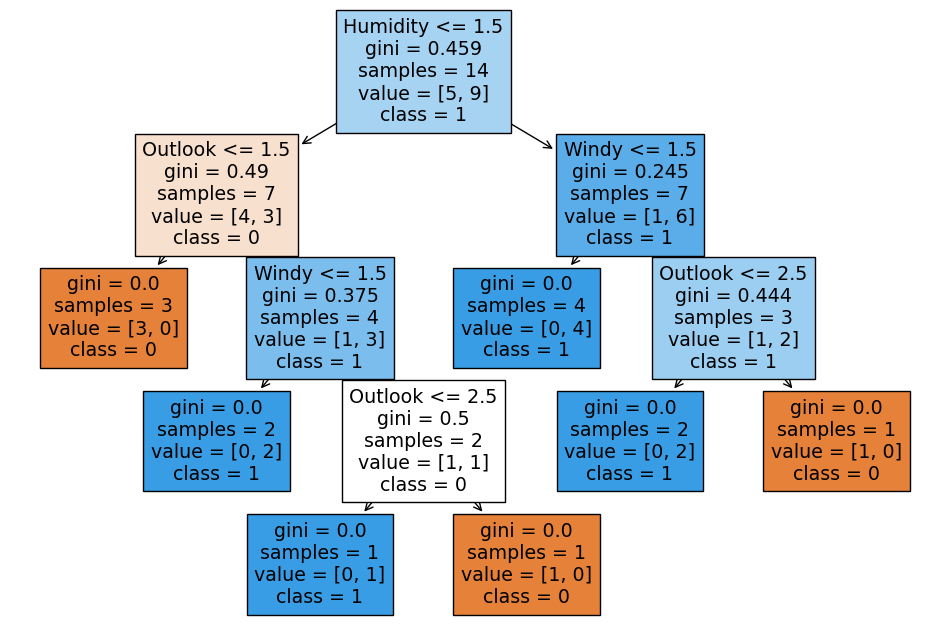

In [ ]:
# DECISION TREE

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


df = pd.read_csv("D:\PlayGolf.csv")
print(df)
feature_col_names = ['Outlook', 'Temp', 'Humidity', 'Windy']
predicted_class_names = ['PlayGolf']

X = df[feature_col_names].values # these are factors for the prediction
y = df[predicted_class_names].values # this is what we want to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create an instance of the Decision Tree Classifier
model = DecisionTreeClassifier()

# Fit the model to the entire dataset
model.fit(X, y)

# Define new data
new_data = pd.DataFrame([[1,3,1,2]],columns=feature_col_names)

# Make predictions on the new data
predictions = model.predict(new_data)

# Print the predicted outcomes
for i, prediction in enumerate(predictions):
    print("\nPrediction for sample", i+1, ": ", prediction)
    
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
    
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=feature_col_names, class_names=['0', '1'], filled=True)
plt.show()

Prediction for sample 1 :  1
Prediction for sample 2 :  0
Accuracy: 0.7207792207792207


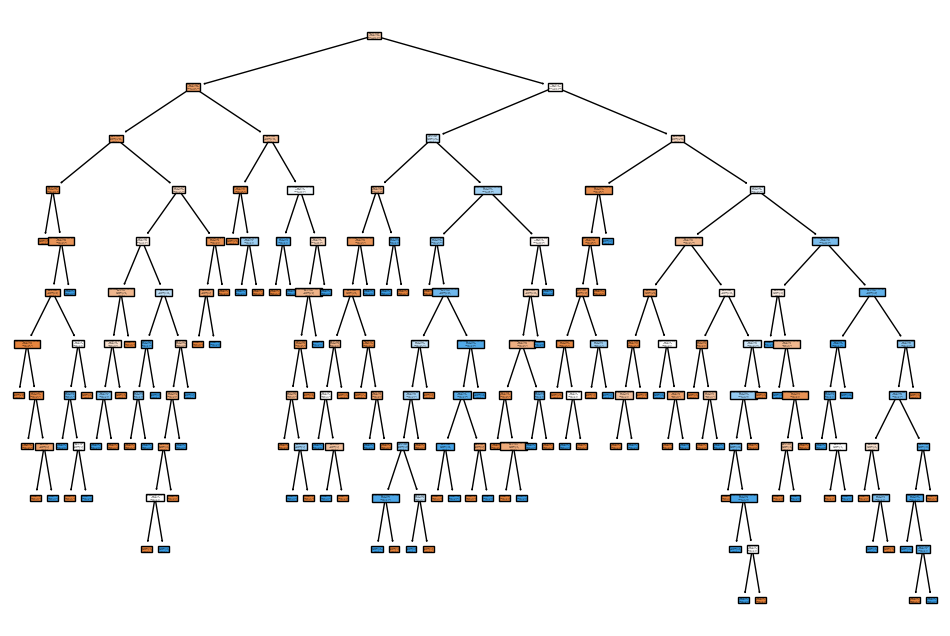

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the diabetes dataset
df = pd.read_csv("D://diabetes.csv")

# Split the dataset into features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

new_data = pd.DataFrame([[6, 148, 72, 35, 0, 33.6, 0.627, 50],
                         [1, 85, 66, 29, 0, 26.6, 0.351, 31]],
                        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Make predictions on the new data
predictions = model.predict(new_data)

# Print the predicted outcomes
for i, prediction in enumerate(predictions):
    print("Prediction for sample", i+1, ": ", prediction)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize one of the decision trees in the Random Forest
tree_index = 0  # Index of the tree to visualize

plt.figure(figsize=(12, 8))
tree.plot_tree(rf_model.estimators_[tree_index], feature_names=feature_cols, class_names=['0', '1'], filled=True)
plt.show()

Accuracy: 0.7857142857142857


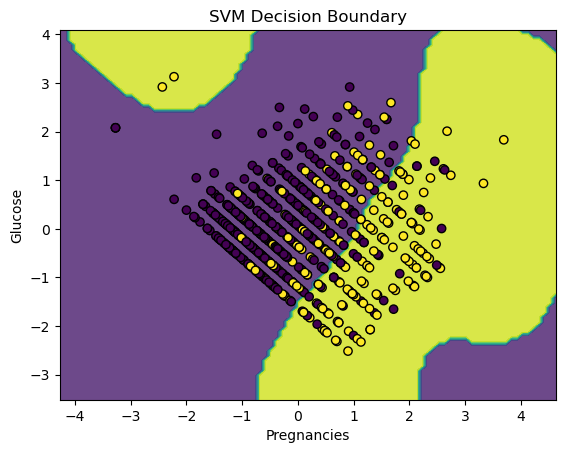

In [ ]:
#SUPPORT VECTOR MACHINE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Load the dataset
df = pd.read_csv("D://diabetes.csv")

# Define the feature columns and the target column
feature_cols = ['Pregnancies', 'Glucose']
target_col = 'Outcome'

# Split the dataset into features and target
X = df[feature_cols]
y = df[target_col]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create an instance of the SVM classifier
model = SVC()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a meshgrid of points to visualize the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k')
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.title("SVM Decision Boundary")
plt.show()


0.7467532467532467
0.7532467532467533


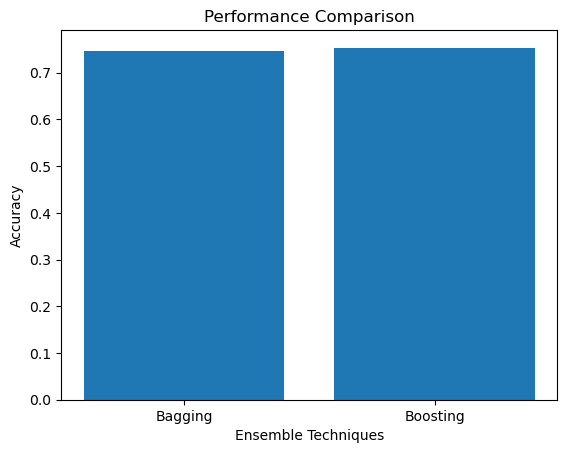

In [ ]:
#ENSEMBLE TECHNIQUES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier


# Load the dataset
df = pd.read_csv("D://diabetes.csv")

# Define the feature columns and the target column
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_col = 'Outcome'

# Split the dataset into features and target
X = df[feature_cols]
y = df[target_col]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Bagging
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print(bagging_accuracy)

# Boosting
boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
boosting_model.fit(X_train, y_train)
boosting_predictions = boosting_model.predict(X_test)
boosting_accuracy = accuracy_score(y_test, boosting_predictions)
print(boosting_accuracy)

# Visualize the performance
models = ['Bagging', 'Boosting']
accuracies = [bagging_accuracy, boosting_accuracy]

plt.bar(models, accuracies)
plt.xlabel('Ensemble Techniques')
plt.ylabel('Accuracy')
plt.title('Performance Comparison')
plt.show()

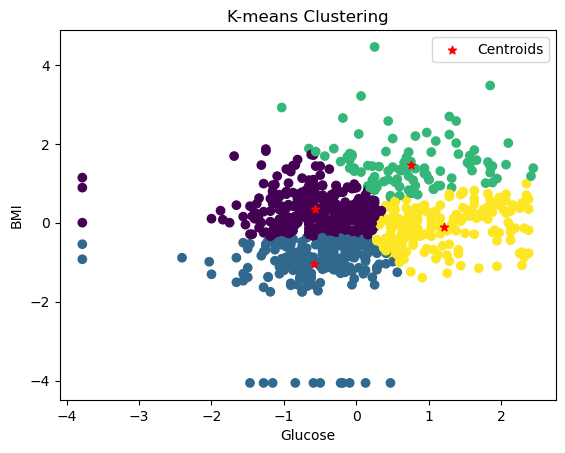

In [ ]:
# K MEANS ALGORITHM

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv("D://diabetes.csv")

# Select relevant features for clustering
X = df[['Glucose', 'BMI']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', color='red', label='Centroids')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('K-means Clustering')
plt.legend()
plt.show()

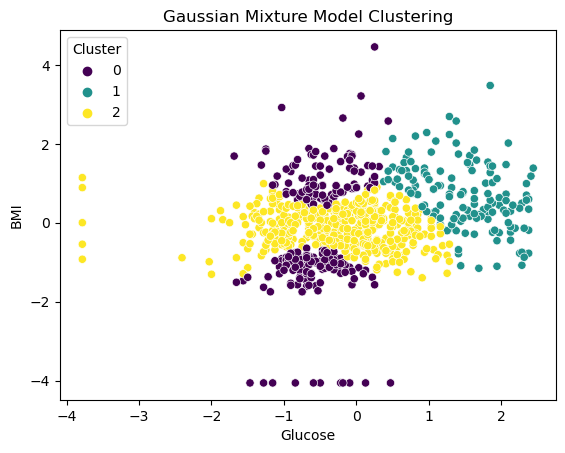

In [ ]:
# GAUSIAN MIXTURE MODEL

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


# Load the diabetes dataset
df = pd.read_csv("D:/diabetes.csv")

# Select relevant features for clustering
X = df[['Glucose', 'BMI']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Gaussian Mixture Model
n_components = 3  # Number of Gaussian components
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_scaled)

# Get the cluster labels
labels = gmm.predict(X_scaled)

# Visualize the clusters
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Gaussian Mixture Model Clustering')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# EM BAYESIAN NETWORKS

### 'conda install -c ankurankan pgmpy' run this anaconda terminal
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
import numpy as np
import pandas as pd

# Define the Bayesian network structure
model = BayesianNetwork([('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'E')])

# Generate some random data for learning
data = np.random.randint(low=0, high=2, size=(1000, 5))
data = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E'])

# Initialize the parameters randomly
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Perform EM algorithm
for _ in range(10):  # Number of EM iterations
    # Expectation step
    model.fit(data, estimator=BayesianEstimator, prior_type='BDeu')

    # Maximization step
    model.fit(data, estimator=MaximumLikelihoodEstimator)

# Print the learned parameters
for cpd in model.get_cpds():
    print(cpd)


+------+-------+
| A(0) | 0.475 |
+------+-------+
| A(1) | 0.525 |
+------+-------+
+------+------+---------------------+--------------------+--------------------+
| A    | A(0) | A(0)                | A(1)               | A(1)               |
+------+------+---------------------+--------------------+--------------------+
| B    | B(0) | B(1)                | B(0)               | B(1)               |
+------+------+---------------------+--------------------+--------------------+
| C(0) | 0.52 | 0.49333333333333335 | 0.4574898785425101 | 0.4748201438848921 |
+------+------+---------------------+--------------------+--------------------+
| C(1) | 0.48 | 0.5066666666666667  | 0.5425101214574899 | 0.5251798561151079 |
+------+------+---------------------+--------------------+--------------------+
+------+-------+
| B(0) | 0.497 |
+------+-------+
| B(1) | 0.503 |
+------+-------+
+------+--------------------+--------------------+
| B    | B(0)               | B(1)               |
+------+

In [1]:
#ARTIFICIAL NEURAL NETWORK

import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X / np.amax(X, axis=0)  # maximum of X array longitudinally
y = y / 100


# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)


# Variable initialization
epoch = 7000  # Setting training iterations
lr = 0.1  # Setting learning rate
inputlayer_neurons = 2  # number of features in data set
hiddenlayer_neurons = 3  # number of hidden layers neurons
output_neurons = 1  # number of neurons at output layer
# weight and bias initialization
wh = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
bh = np.random.uniform(size=(1, hiddenlayer_neurons))
wout = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))
bout = np.random.uniform(size=(1, output_neurons))
# draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    # Forward Propogation
    hinp1 = np.dot(X, wh)
    hinp = hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1 = np.dot(hlayer_act, wout)
    outinp = outinp1 + bout
    output = sigmoid(outinp)
    # Backpropagation
    EO = y - output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    wout += hlayer_act.T.dot(d_output) * lr
    # bout += np.sum(d_output, axis=0,keepdims=True) *lr
    wh += X.T.dot(d_hiddenlayer) * lr
    # bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n", output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89604435]
 [0.87799374]
 [0.89525737]]


In [2]:
# DEEP LEARNING NEURAL NETWORK

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Simple dataset
X_train = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_train = [0, 1, 1, 0]

# Define the model architecture
model = Sequential([
    Dense(4, activation='relu', input_shape=(2,)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10)

# Make predictions
X_new_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
predictions = model.predict(X_new_data)
print(predictions)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6747 - accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6744 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6741 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 23ms/step - loss: 0.6738 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6734 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 26ms/step - loss: 0.6731 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6728 - accuracy: 0.7500
Epoch 8/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6724 - accuracy: 0.7500
Epoch 9/10
1/1 [==============================] - 0s 18ms/step - loss: 0.6721 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 448ms/step
[[0.49867293]
 [0.58492666]
 [0.52671736]
 [0.55853534]]
